<a href="https://www.kaggle.com/code/emanuelascardapane/losing-our-languages-geospatial-data-viz?scriptVersionId=181855793" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:2px;color:white;margin:0;font-size:150%;text-align:center;display:fill;border-radius:20px;background-color:#9370db;font-weight:500">
    <h1>Losing Our Languages</h1><h2>Endangered and Extinct Languages in the World</h2></div>

<div style = 'border : 3px solid non; background-color:#f2f2f2;font-size:110%;padding:10px'>


* **[1. Brief Explanation of the Dataset](#1)**

   
* **[2. About This Project](#2)**


* **[3. Reading Data](#3)**

* **[4. Data Cleaning](#4)**

* **[5.  Geopandas Data Frame](#5)**

* **[6. Interactive Map with Folium](#6)**
    
* **[7. Visualizing Data as Bar Charts and Pie Charts (Worldwide and Italy)](#7)**

* **[8. Interactive Map with Plotly: Europe](#8)**
    
    
     
     
    
    

    



<a id="1"></a>
<div style="padding:2px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:40px;background-color:#9370db;font-weight:500">
    1. A Brief Explanation of the Dataset
</div>


<div style="padding:2px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:20px;background-color:#9370db;font-weight:400">
    The dataset we are going to analyze contains a list of endangered languages from around the world. <b>UNESCO</b> provides a classification system based on the likelihood of a language disappearing:</div>

*    **Vulnerable** - most children speak the language, but it may be restricted to certain domains (e.g., home)
*     **Definitely endangered** - children no longer learn the language as a 'mother tongue' in the home
*    **Severely endangered** - language is spoken by grandparents and older generations; while the parent generation may understand it, they do not speak it to children or among themselves
* **Critically endangered** - the youngest speakers are grandparents and older, and they speak the language partially and infrequently
* **Extinct** - there are no speakers left





Source: https://www.theguardian.com/news/datablog/2011/apr/15/language-extinct-endangered



<a id="2"></a>
<div style="padding:2px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:40px;background-color:#9370db;font-weight:500">
    2. About this Project</div>


   The primary objective of this kernel is to leverage data visualization and geospatial analysis techniques to explore the phenomenon of endangered languages worldwide using the UNESCO dataset. The aim is not only to practice advanced data visualization skills but also to raise awareness about cultural heritage and the importance of preserving linguistic diversity 
   
   Key aspects of the project include:
-Data Analysis and Preprocessing: Leveraged Pandas for data manipulation and cleaning, ensuring a robust and reliable dataset for visualization.
-Geospatial Analysis: Employed Geopandas and Folium to map the distribution of endangered languages globally, providing intuitive visual context to the data.
-Interactive Visualizations: Utilized Plotly to create interactive plots, enhancing user engagement and facilitating deeper insights into the data.
-Statistical Insights: Applied Matplotlib and Seaborn for detailed statistical visualizations, uncovering trends and patterns within the data.
  

   We will be using the following Python libraries: Geopandas, Folium, Plotly, Matplotlib, Seaborn, and Pandas.
   
Resources for Geopandas and Folium: https://www.kaggle.com/learn/geospatial-analysis

**Import libraries**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.markers import MarkerStyle
import matplotlib.colors as mcolors
import seaborn as sns 
import pandas as pd 
import geopandas as gpd
from geopandas import GeoDataFrame
import folium
from folium.plugins import MarkerCluster
import plotly.graph_objects as go
import plotly.express as px

/kaggle/input/extinct-languages/data.csv


<div style="padding:2px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:20px;background-color:#9370db;font-weight:400">
    We'll use a color palette that should be visible for people with colorblindness (protanopia, deuteranopia, or tritanopia). However we'll avoid conveying information purely through color. </div>

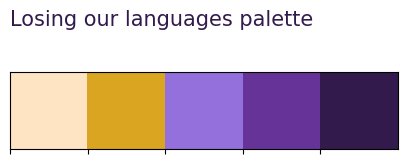

In [2]:
#uncomment to see a list of matplotlib avaliable colors
#and their HTML codes
#for name, hex in matplotlib.colors.cnames.items():
    #print(name, hex)

#plotting the palette
my_indigo='#331a4d'
sns.palplot(['bisque','goldenrod', 'mediumpurple', 'rebeccapurple',my_indigo])
plt.title("Losing our languages palette ",loc='left',fontsize=15,y=1.5, color=my_indigo)
plt.show()

<a id="3"></a>
<div style="padding:2px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:40px;background-color:#9370db;font-weight:500">
    3. Reading Data
</div>

In [3]:
# Reading the csv
df_full_data = pd.read_csv('../input/extinct-languages/data.csv')
df_full_data.head(3)

ID Name in English  Name in French      Name in Spanish  \
0  1022   South Italian  italien du sud  napolitano-calabrés   
1  1023        Sicilian        sicilien            siciliano   
2   383       Low Saxon       bas-saxon           bajo sajón   

                                           Countries    Country codes alpha 3  \
0                                              Italy                      ITA   
1                                              Italy                      ITA   
2  Germany, Denmark, Netherlands, Poland, Russian...  DEU, DNK, NLD, POL, RUS   

                                     ISO639-3 codes Degree of endangerment  \
0                                               nap             Vulnerable   
1                                               scn             Vulnerable   
2  act, drt, frs, gos, nds, sdz, stl, twd, vel, wep             Vulnerable   

                                     Alternate names Name in the language  \
0  Neapolitan; Neapolitan-Calabrese; неаполитанск...                  NaN   
1                                                NaN                  NaN   
2  Low German, Niedersächsisch, Nedersaksisch, Ni...       Neddersassisch   

   Number of speakers Sources  Latitude  Longitude  \
0           7500000.0     NaN   40.9798    15.2490   
1           5000000.0     NaN   37.4399    14.5019   
2           4800000.0     NaN   53.4029    10.3601   

                         Description of the location  
0  Campania, Lucania (Basilicata), Abruzzi (Abruz...  
1  Sicily (Sicilia), southern and central Calabri...  
2  northern Germany, the north-eastern part of th...

<div style="padding:2px;color:black;margin:0;font-size:100%;text-align:center;display:fill;border-radius:0px;background-color:#FFE4C4;font-weight:100">
    The dataset contains <b>2722</b> entries and <b>15</b> columns. Some columns are redundant and will be dropped in the following analysis.
</div>

In [4]:
# columns gives column names of features
df_full_data.columns

Index(['ID', 'Name in English', 'Name in French', 'Name in Spanish',
       'Countries', 'Country codes alpha 3', 'ISO639-3 codes',
       'Degree of endangerment', 'Alternate names', 'Name in the language',
       'Number of speakers', 'Sources', 'Latitude', 'Longitude',
       'Description of the location'],
      dtype='object')

In [5]:
# shape gives number of rows and columns in a tuble
df_full_data.shape

(2722, 15)

In [6]:
# .info() gives data type, feature types, number of rows, 
#number of columns
df_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722 entries, 0 to 2721
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2722 non-null   int64  
 1   Name in English              2722 non-null   object 
 2   Name in French               2699 non-null   object 
 3   Name in Spanish              2701 non-null   object 
 4   Countries                    2721 non-null   object 
 5   Country codes alpha 3        2721 non-null   object 
 6   ISO639-3 codes               2458 non-null   object 
 7   Degree of endangerment       2722 non-null   object 
 8   Alternate names              1583 non-null   object 
 9   Name in the language         27 non-null     object 
 10  Number of speakers           2539 non-null   float64
 11  Sources                      2079 non-null   object 
 12  Latitude                     2719 non-null   float64
 13  Longitude         

<div style="padding:2px;color:black;margin:0;font-size:100%;text-align:center;display:fill;border-radius:0px;background-color:#FFE4C4;font-weight:100">
   The columns <b>'Name in English'</b> and <b>'Degree of endangerment'</b> in the dataset have no <b>missing values</b>. All the other columns have some missing values. 
</div>

In [7]:
#Checking missing values 
print('\n How many missing values? \n ',df_full_data.isna().sum())


 How many missing values? 
  ID                                0
Name in English                   0
Name in French                   23
Name in Spanish                  21
Countries                         1
Country codes alpha 3             1
ISO639-3 codes                  264
Degree of endangerment            0
Alternate names                1139
Name in the language           2695
Number of speakers              183
Sources                         643
Latitude                          3
Longitude                         3
Description of the location     852
dtype: int64


<div style="padding:2px;color:black;margin:0;font-size:100%;text-align:center;display:fill;border-radius:0px;background-color:#FFE4C4;font-weight:100">
    Checking the languages with NAN values in <b>'Countries'</b>  and <b>'Latitude'</b> or <b>'Longitude'</b>
</div>

In [8]:
# check where are the NAN values
print('\n \n Language with missing country:\n')
df_full_data[df_full_data['Countries'].isna()]


 
 Language with missing country:



ID Name in English Name in French Name in Spanish Countries  \
405  1680            Boro           boro            boro       NaN   

    Country codes alpha 3 ISO639-3 codes Degree of endangerment  \
405                   NaN            bwo  Definitely endangered   

    Alternate names Name in the language  Number of speakers  \
405        Shinasha                  NaN             19878.0   

                    Sources  Latitude  Longitude Description of the location  
405  Census, Zelealem Leyew   10.3581    35.0024                         NaN

In [9]:
print('Languages with missing Latitude and Longitude value: \n')
df_full_data[df_full_data['Latitude'].isna()]['Name in English']

Languages with missing Latitude and Longitude value: 



742     Romani (Colombia)
2200               Umbrul
2335             Dorasque
Name: Name in English, dtype: object

<a id="4"></a>
<div style="padding:2px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:40px;background-color:#9370db;font-weight:500">
    4. Data Cleaning
</div>


<div style="padding:2px;color:black;margin:0;font-size:100%;text-align:center;display:fill;border-radius:0px;background-color:#FFE4C4;font-weight:100">
We are dealing with some <b>missing values</b> before proceeding with building a GeoPandas dataframe.

<b>ISO639-3</b> is an index that assigns 3-letter codes to a vast catalog of languages. The entry with the missing country is uniquely identified with the code 'bwo'. The latitude and longitude are present (so we can verify that the language is localized in Ethiopia).

Three entries have missing latitude and longitude. However, the column 'countries' is not empty (and the description of the location provides information), so it's easy to retrieve a localization and replace the NaN values.
</div>

In [10]:
#Note that there are two entries with the same English name 'Boro'. 
#The other values are different; one of them is actually extinct. 

print('Old value of the missing Country was \n ', df_full_data.loc[405,'Countries'])
print('\n and its code alpha 3 was \n', df_full_data.loc[405,'Country codes alpha 3'])
df_full_data.loc[405,'Countries']='Ethiopi'
df_full_data.loc[405,'Country codes alpha 3']='ETH'
print('\n new value of Country is', df_full_data.loc[405,'Countries'])
print('\n new value of the Country codes alpha 3 is',df_full_data.loc[405,'Country codes alpha 3'])

print('Missing country replaced!')

#Missing Latitude and Longitude
print('\n Description of the entries with missing lat, lon: \n', df_full_data[df_full_data['Latitude'].isna()]['Description of the location'])
print('\n Countries of the entries with missing lat, lon: \n ',df_full_data[df_full_data['Latitude'].isna()]['Countries'])

#replace NAN with localization of Vanuatu (Malekula)
df_full_data.loc[2200,'Latitude']=float(-16.369444)
df_full_data.loc[2200,'Longitude']=float(167.539167)


#replace NAN with localization of Colombia (Atlántico Department)
df_full_data.loc[742 ,'Latitude']=float(10.983333)
df_full_data.loc[742 ,'Longitude']=float(-74.783333)


#replace NAN with localization of Panama
df_full_data.loc[2335 ,'Latitude']=float(8.616667)
df_full_data.loc[2335 ,'Longitude']=float(-80.366667)


print('Missing (lat,long) replaced!')

Old value of the missing Country was 
  nan

 and its code alpha 3 was 
 nan

 new value of Country is Ethiopi

 new value of the Country codes alpha 3 is ETH
Missing country replaced!

 Description of the entries with missing lat, lon: 
 742     Se ubican en los departamentos de Atlántico y ...
2200                                             Malekula
2335                                                  NaN
Name: Description of the location, dtype: object

 Countries of the entries with missing lat, lon: 
  742     Colombia
2200     Vanuatu
2335      Panama
Name: Countries, dtype: object
Missing (lat,long) replaced!


<div style="padding:2px;color:black;margin:0;font-size:100%;text-align:center;display:fill;border-radius:0px;background-color:#FFE4C4;font-weight:100">
    Checking that there are no more missing values in 'Countries', 'Latitude' and 'Longitude'. 
</div>

In [11]:
#there are no Missing Values to erase in Latitude and Longitude
#df_full_data=df_full_data.dropna(subset=['Latitude', 'Longitude'], how='any')
print('Checking there are no NAN  values in Countries, Latitude, Longitude \n \n', df_full_data.isna().sum())

Checking there are no NAN  values in Countries, Latitude, Longitude 
 
 ID                                0
Name in English                   0
Name in French                   23
Name in Spanish                  21
Countries                         0
Country codes alpha 3             0
ISO639-3 codes                  264
Degree of endangerment            0
Alternate names                1139
Name in the language           2695
Number of speakers              183
Sources                         643
Latitude                          0
Longitude                         0
Description of the location     852
dtype: int64


**NaN values in 'Number of speakers'**

<div style="padding:2px;color:black;margin:0;font-size:100%;text-align:center;display:fill;border-radius:0px;background-color:#FFE4C4;font-weight:100">
    There are still NaN values in <b>'Number of speakers'</b>. We will leave them as they are for now and erase them only when needed. However, before proceeding, let's check at least the NaN values of the <b>extinct languages</b>, since we expect all extinct languages to have either 0 speakers or at least a very low value.
</div>

In [12]:
print('How many missing values in Extinct languages?')
df_full_data[df_full_data['Degree of endangerment']=='Extinct'].isna().sum()

How many missing values in Extinct languages?


ID                               0
Name in English                  0
Name in French                  21
Name in Spanish                 20
Countries                        0
Country codes alpha 3            0
ISO639-3 codes                  52
Degree of endangerment           0
Alternate names                162
Name in the language           253
Number of speakers               9
Sources                         65
Latitude                         0
Longitude                        0
Description of the location    111
dtype: int64

<div style="padding:2px;color:black;margin:0;font-size:100%;text-align:center;display:fill;border-radius:0px;background-color:#FFE4C4;font-weight:100">
    We do indeed have 9 NaN values in the extinct languages. Are all the other values 0 or very low?
</div>

In [13]:
#df_full_data[df_full_data['Degree of endangerment']=='Extinct']

#Nan Value not considered 
df_full_data[df_full_data['Degree of endangerment']=='Extinct'].describe()

ID  Number of speakers    Latitude   Longitude
count   253.000000          244.000000  253.000000  253.000000
mean   1105.086957           55.909836   19.133562    9.921425
std     843.512215          774.907556   26.242346   95.846042
min       4.000000            0.000000  -54.622900 -173.965700
25%     447.000000            0.000000   -2.855200  -76.501600
50%     822.000000            0.000000   23.001300   20.759000
75%    1838.000000            0.000000   40.040200   94.560000
max    2713.000000        12000.000000   69.287200  176.918300

In [14]:
df_full_data[df_full_data['Degree of endangerment']=='Extinct'].loc[:,'Number of speakers'].value_counts()

Number of speakers
0.0        239
1.0          2
12000.0      1
1637.0       1
3.0          1
Name: count, dtype: int64

<div style="padding:2px;color:black;margin:0;font-size:100%;text-align:center;display:fill;border-radius:0px;background-color:#FFE4C4;font-weight:100">
    It seems that there are <b>two</b> values in <b>'Number of speakers'</b>  of extinct languages that range out of scale. <b>239</b> are null, as expected. The remaining <b>three </b>are either 3 or 1, which are actually very low (as expected).
</div>

In [15]:
#first rows in extinct languages (higher number of speakers)
df_full_data[df_full_data['Degree of endangerment']=='Extinct']['Number of speakers'].head(6)

485     12000.0
1040     1637.0
2221        3.0
2269        1.0
2277        1.0
2282        0.0
Name: Number of speakers, dtype: float64

<div style="padding:2px;color:black;margin:0;font-size:100%;text-align:center;display:fill;border-radius:0px;background-color:#FFE4C4;font-weight:100">
     <b>NaN</b> values are the last 9 values of the subset since the dataframe is ordered by the  <b>'Number of speakers'</b>.
</div>

In [16]:
#.tail()
df_full_data[df_full_data['Degree of endangerment']=='Extinct']['Number of speakers'].tail(10)

2538    0.0
2561    NaN
2568    NaN
2593    NaN
2619    NaN
2663    NaN
2679    NaN
2699    NaN
2706    NaN
2712    NaN
Name: Number of speakers, dtype: float64

<div style="padding:2px;color:black;margin:0;font-size:100%;text-align:center;display:fill;border-radius:0px;background-color:#FFE4C4;font-weight:100">
     Replace <b>NaN</b> values with the most frequent value, that is zero.
</div>

In [17]:
df_full_data[df_full_data['Degree of endangerment']=='Extinct']['Number of speakers'].fillna(0)

485     12000.0
1040     1637.0
2221        3.0
2269        1.0
2277        1.0
         ...   
2663        0.0
2679        0.0
2699        0.0
2706        0.0
2712        0.0
Name: Number of speakers, Length: 253, dtype: float64

In [18]:
#replace NaN of the data set
df_full_data.loc[df_full_data['Degree of endangerment']=='Extinct','Number of speakers']=df_full_data[df_full_data['Degree of endangerment']=='Extinct']['Number of speakers'].fillna(0)

In [19]:
#check
df_full_data[df_full_data['Degree of endangerment']=='Extinct'].loc[:,'Number of speakers'].value_counts()

Number of speakers
0.0        248
1.0          2
12000.0      1
1637.0       1
3.0          1
Name: count, dtype: int64

In [20]:
print(' NaN values in Number of Speakers of extinct languages :')
df_full_data[df_full_data['Degree of endangerment']=='Extinct']['Number of speakers'].isna().sum()

 NaN values in Number of Speakers of extinct languages :


0

<a id="5"></a>
<div style="padding:2px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:40px;background-color:#9370db;font-weight:500">
  5. Geopandas Data Frame
</div>

In [21]:
#Creating a geopandas.dataframe from the pd.dataframe 

#First step: adding the column "geometry" using Point
from shapely.geometry import Point 
df_full_data['geometry'] = df_full_data.apply(lambda row:Point(row['Longitude'],row['Latitude']), axis=1)
print('\n \n Adding the column "geometry"\n \n ')
df_full_data.head(2)


 
 Adding the column "geometry"
 
 


/opt/conda/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:131: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


ID Name in English  Name in French      Name in Spanish Countries  \
0  1022   South Italian  italien du sud  napolitano-calabrés     Italy   
1  1023        Sicilian        sicilien            siciliano     Italy   

  Country codes alpha 3 ISO639-3 codes Degree of endangerment  \
0                   ITA            nap             Vulnerable   
1                   ITA            scn             Vulnerable   

                                     Alternate names Name in the language  \
0  Neapolitan; Neapolitan-Calabrese; неаполитанск...                  NaN   
1                                                NaN                  NaN   

   Number of speakers Sources  Latitude  Longitude  \
0           7500000.0     NaN   40.9798    15.2490   
1           5000000.0     NaN   37.4399    14.5019   

                         Description of the location                 geometry  
0  Campania, Lucania (Basilicata), Abruzzi (Abruz...   POINT (15.249 40.9798)  
1  Sicily (Sicilia), southern and central Calabri...  POINT (14.5019 37.4399)

In [22]:
#selecting the columns with .loc, keeping all the rows
#cordinate reference system crs="EPSG:4326"

gdf = GeoDataFrame(df_full_data.loc[:,["Name in English","Country codes alpha 3","Countries","Degree of endangerment","Number of speakers","Latitude", "Longitude","geometry"]], crs="EPSG:4326")
# Renaming the columns

gdf= gdf.rename(columns={'Name in English': 'name', "Country codes alpha 3":'iso_a3','Degree of endangerment': 'danger_degree', 'Number of speakers': 'speakers', "Latitude":"latitude","Longitude":"longitude", "Countries": "countries"})

print('We created a GeoDataFrame:\n')
gdf.head(2)

We created a GeoDataFrame:



name iso_a3 countries danger_degree   speakers  latitude  \
0  South Italian    ITA     Italy    Vulnerable  7500000.0   40.9798   
1       Sicilian    ITA     Italy    Vulnerable  5000000.0   37.4399   

   longitude                   geometry  
0    15.2490  POINT (15.24900 40.97980)  
1    14.5019  POINT (14.50190 37.43990)

<div style="padding:2px;color:black;margin:0;font-size:100%;text-align:center;display:fill;border-radius:0px;background-color:#FFE4C4;font-weight:200">
Each language in the dataset is provided with geolocation coordinates (latitude, longitude). <b>First, let's take a glance at what we have.</b>
</div>

/tmp/ipykernel_18/2787610225.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


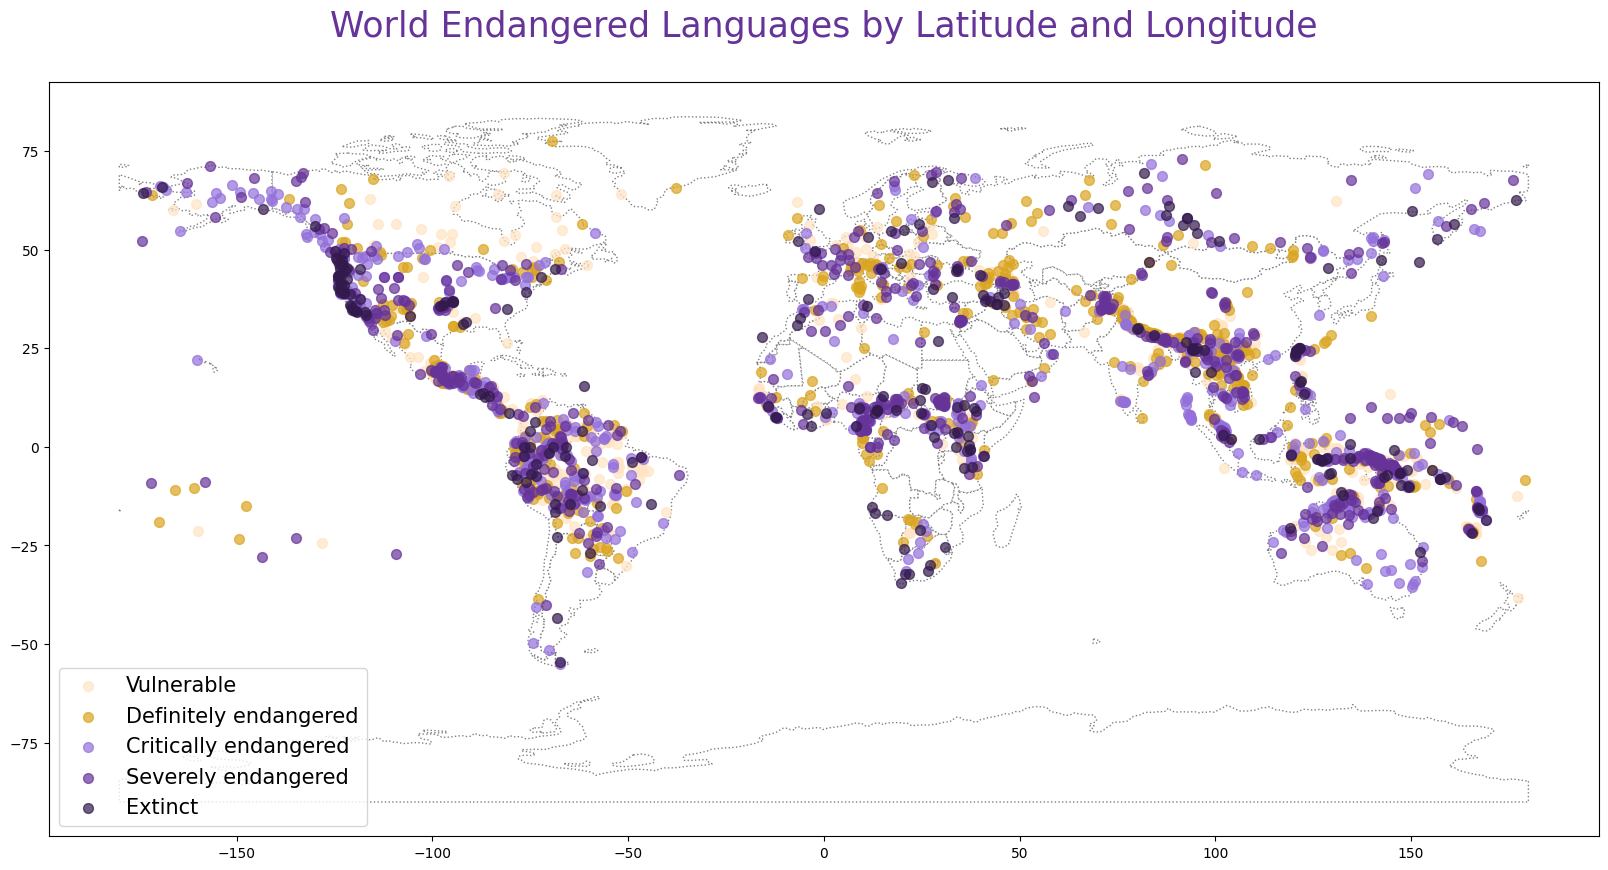

In [23]:
# This dataset is provided in GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)

#markers
filled_marker_style = dict(marker='o', markersize=50)

#palette and labels
degree_of_danger=['Vulnerable','Definitely endangered','Critically endangered','Severely endangered','Extinct' ]
color_map=['bisque','goldenrod','mediumpurple','rebeccapurple', my_indigo]


ax=world.plot(figsize=(20,20), color='white', linestyle=':', edgecolor='gray')
for i in range(0,len(degree_of_danger)):
        gdf[gdf['danger_degree']==degree_of_danger[i]].plot(ax=ax, 
                                                            **filled_marker_style, 
                                                            color=color_map[i],
                                                            alpha=0.7, 
                                                            label=degree_of_danger[i])

plt.legend(loc='best', fontsize='15')
plt.title('World Endangered Languages by Latitude and Longitude', fontsize='25', color='rebeccapurple',y=1.05)
plt.show()

<a id="6"></a>
<div style="padding:2px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:40px;background-color:#9370db;font-weight:500">
  6. Interactive Map with Folium
</div>

<div style="padding:2px;color:black;margin:0;font-size:100%;text-align:center;display:fill;border-radius:0px;background-color:#FFE4C4;font-weight:200">
Let's create an <b>interactive world map</b>: we can zoom in and out and read data information by clicking on the circle markers. 
</div>

In [24]:
# Create an interactive world map to show where are the endagered languages


world_map= folium.Map(tiles="cartodbpositron", min_zoom=2)
map_title = "World Endangered Languages"
title_html = f'<h1 style="position:absolute;z-index:100000;left:10vw" >{map_title}</h1>'
#if you prefer creating clusters use
#marker_cluster = MarkerCluster().add_to(world_map)


#different size of circle markers 
radius={'Vulnerable':5, 
        'Definitely endangered':5, 
        'Severely endangered':4, 
        'Critically endangered':4,
        'Extinct':4}

#color palette of the extintion risk
my_palette={'Vulnerable':'bisque', 
        'Definitely endangered':'goldenrod', 
        'Severely endangered':'mediumpurple', 
        'Critically endangered':'rebeccapurple',
        'Extinct':my_indigo}

#for each coordinate, create circlemarker 
for i in range(len(gdf)): 
        lat = gdf.iloc[i]['latitude'] #circle markers coordinates
        long = gdf.iloc[i]['longitude']#circle markers coordinates
        #popup text on the chart
        popup_text = """<span style="font-weight:bolder"> Countries </span>: {}<br>  
                     <span style="font-weight:bolder"> Language </span>: {}<br>
                     <span style="font-weight:bolder">Danger </span>: {} <br>"""
        popup= popup_text.format(gdf.iloc[i]['countries'],
                                   gdf.iloc[i]['name'],
                                gdf.iloc[i]['danger_degree']) 
        #adding circle markers
        folium.CircleMarker(location = [lat, long], 
                            radius=radius.get(gdf.iloc[i]['danger_degree']),#size from the radius dict
                            popup=popup, #popup text
                            fill_color = my_palette.get(gdf.iloc[i]['danger_degree']), #colors from my_palette dict
                            fill=True, 
                            fill_opacity=0.7,
                            color=False
                            ).add_to(world_map)#show the map   
                            #if you prefer bubble cluster use .add_to(marker_cluster)
world_map.get_root().html.add_child(folium.Element(title_html))        
world_map

<a id="7"></a>
<div style="padding:2px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:40px;background-color:#9370db;font-weight:500">
  7. Visualizing Data as Bar Charts and Pie Charts (Worldwide and Italy)
</div>

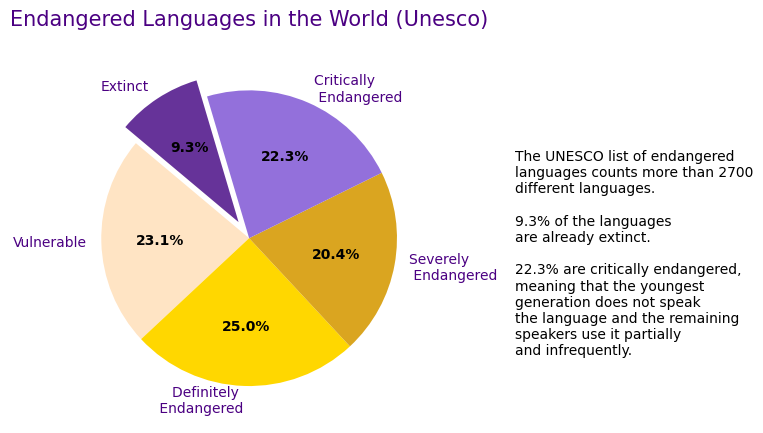

In [25]:
# Pie Chart
fig =plt.subplot()

number_languages = gdf.danger_degree.value_counts().sum()
vulnerable = gdf.danger_degree[gdf.danger_degree=='Vulnerable'].value_counts().sum()
definetely = gdf.danger_degree[gdf.danger_degree=='Definitely endangered'].value_counts().sum()
severely = gdf.danger_degree[gdf.danger_degree=='Severely endangered'].value_counts().sum()
critically = gdf.danger_degree[gdf.danger_degree=='Critically endangered'].value_counts().sum()
extinct = gdf.danger_degree[gdf.danger_degree=='Extinct'].value_counts().sum()


# pie chart parameter
labels = 'Vulnerable', 'Definitely \n Endangered', 'Severely \n Endangered', 'Critically \n Endangered', 'Extinct'
sizes = [vulnerable/number_languages, 
         definetely /number_languages,
         severely/number_languages,
         critically/number_languages, 
         extinct/number_languages]
colors = ['bisque','gold', 'goldenrod', 'mediumpurple', 'rebeccapurple']
explode = (0, 0, 0,0,0.13)  

wedges, texts, autotexts =plt.pie(sizes, explode=explode, 
                                  labels=labels, 
                                  colors=colors, 
                                  autopct='%1.1f%%',
                                  labeldistance=1.1,
                                  shadow=False, 
                                  startangle=140,
                                  textprops=dict(color="black")
                                  )

plt.title('Endangered Languages in the World (Unesco)', pad = 20, fontsize = 15, color='indigo')
plt.setp(texts, size=10, color='indigo') #text label of the pie chart
plt.setp(autotexts, size=10, weight='bold') #percentage text on the pie chart


fig.text(1.8, -0.9, '''
The UNESCO list of endangered 
languages counts more than 2700
different languages.

9.3% of the languages 
are already extinct.

22.3% are critically endangered, 
meaning that the youngest 
generation does not speak 
the language and the remaining 
speakers use it partially 
and infrequently.
'''
, fontsize=10, fontweight='light', color='black')

plt.show()

<div style="padding:2px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:20px;background-color:#9370db;font-weight:400">  
<ol>
<li>The  countries with the highest numbers of endangered and extinct languages are <b>Usa</b>,<b>India</b>, <b>Brazil</b>, <b>Indonesia</b> , <b>China</b>, <b>Mexico</b> and <b>Russian Federation</b>
</li>  
<li>India, China, USA and Indonesia are also the most populed countries in the world
</li> 
<li>Not considering the extinct languages, the countries with the highest numbers of endangered languages are <b>India</b> and <b>Brazil</b> followed by the Usa in third position
</li>
<li><b>Papua New Guinea</b> is also among the top positions in the world for language diversity ranking
</li>
</ol>
</div>

Sources: 
https://nationsgeo.com/population/countries-by-population/
https://en.wikipedia.org/wiki/Linguistic_diversity_index

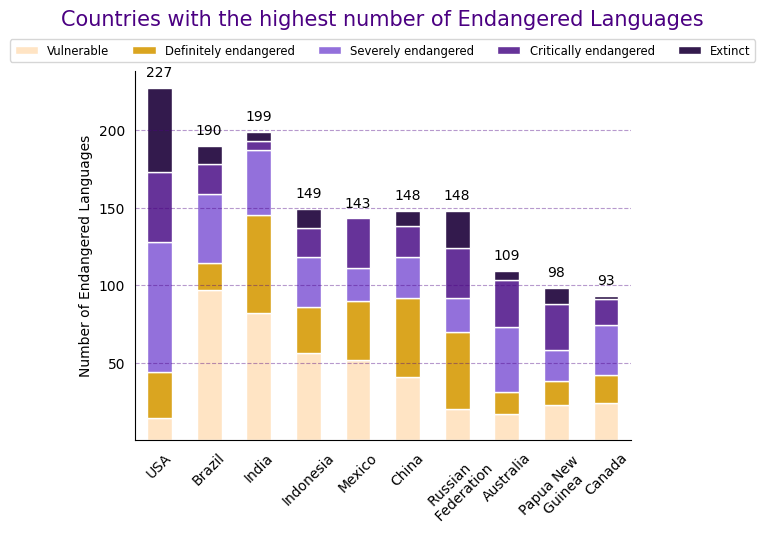

In [26]:
#for the countries with highest number of endangered languages 
#which is the number of languages belonging to each of Unesco category?

degree_danger=['Vulnerable','Definitely endangered','Severely endangered','Critically endangered','Extinct' ]

#first 10 countries with highest number of endangered languages
countries_list= [x for x in gdf.countries.value_counts()[:10].index] 


vulnerable_list=[]
definitely_list=[]
critically_list=[]
severely_list=[]
extinct_list=[]

#counting how many languages belong to each risk category for every country in countries_list
#since there are entries where the column "Countries" contains
#a list of countries rather than a single country
#we use str.contains
for degree in degree_danger:
    for country in countries_list:
        if degree=='Vulnerable':
            vulnerable_list.append(len(gdf.name[(gdf.countries.str.contains(country))& (gdf.danger_degree==degree)]))
        elif degree=='Definitely endangered':
            definitely_list.append(len(gdf.name[(gdf.countries.str.contains(country))& (gdf.danger_degree==degree)]))
        elif degree=='Critically endangered':
            critically_list.append(len(gdf.name[(gdf.countries.str.contains(country))& (gdf.danger_degree==degree)]))
        elif degree=='Severely endangered':
            severely_list.append(len(gdf.name[(gdf.countries.str.contains(country))& (gdf.danger_degree==degree)]))
        else:
            extinct_list.append(len(gdf.name[(gdf.countries.str.contains(country))& (gdf.danger_degree==degree)]))

#plotting
index = countries_list

#dataframe to plot
data = pd.DataFrame({degree_danger[0]:vulnerable_list,
                        degree_danger[1]:definitely_list,
                        degree_danger[2]:critically_list,
                        degree_danger[3]:severely_list,
                        degree_danger[4]:extinct_list,
                       }, index=index)


#bar chart
ax = data.plot.bar(stacked=True, color={degree_danger[0]: 'bisque',
                                            degree_danger[1]: 'goldenrod',
                                            degree_danger[2]:'mediumpurple',
                                            degree_danger[3]: 'rebeccapurple',
                                            degree_danger[4]: my_indigo}, 
                      edgecolor='white')

#add total languages column
data['tot_languages']=data.sum(axis=1, numeric_only=True)


#annotations
for i in range(0, len(countries_list)):
    ax.annotate(f"{data.tot_languages.iloc[i]}", 
                   xy=(i, data.tot_languages.iloc[i]+10), 
                   va = 'center', ha='center',fontweight='light')
    
    
#set grid
ax.grid(axis='y', linestyle='--', alpha=0.4, color='indigo') 


#set title
ax.set_title('Countries with the highest number of Endangered Languages', 
            color='indigo', 
            fontsize=15, y=1.1)


#Remove borders
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
#legend
ax.legend(ncols=len(degree_danger), bbox_to_anchor=(0.5,1.1),
              loc='upper center', fontsize='small', labelcolor='black')  


#set y ticks labels
ax.set_yticks([50,100,150,200])
ax.set_yticklabels([50,100,150,200])

#adjust labels on the x axis 
xlabels=countries_list
xlabels[0]='USA'
xlabels[-2]='Papua New \n Guinea'
xlabels[-4]='Russian \n Federation'
ax.set_xticks([x for x in range(0,len(countries_list))]) #do this first to avoid warning
ax.set_xticklabels(xlabels) #then set the xtickslabels
ax.tick_params(axis='x', labelrotation=45) #rotation 
ax.tick_params(bottom=False, labelsize=15)  # remove bottom ticks 
ax.tick_params(left=False, labelsize=15)  # remove left ticks 

plt.yticks(fontsize=10, color='black')
plt.xticks(fontsize=10, color='black') #size and colors


plt.ylabel('Number of Endangered Languages', fontsize=10, color='black')
plt.show()



#Pie Chart
data.loc['Other countries'] = [0, 0, 0,0,0,len(gdf)-data.tot_languages.sum()] 
#plot
fig = px.pie(data, values='tot_languages', 
             names=data.index, 
             color_discrete_sequence=['burlywood','bisque','goldenrod','gold','mediumpurple','rebeccapurple','blueviolet','indigo',my_indigo,'thistle'],
             title='Endangered and Extinct Languages by countries',
             )

fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.update_traces(sort=False) 
fig.show()

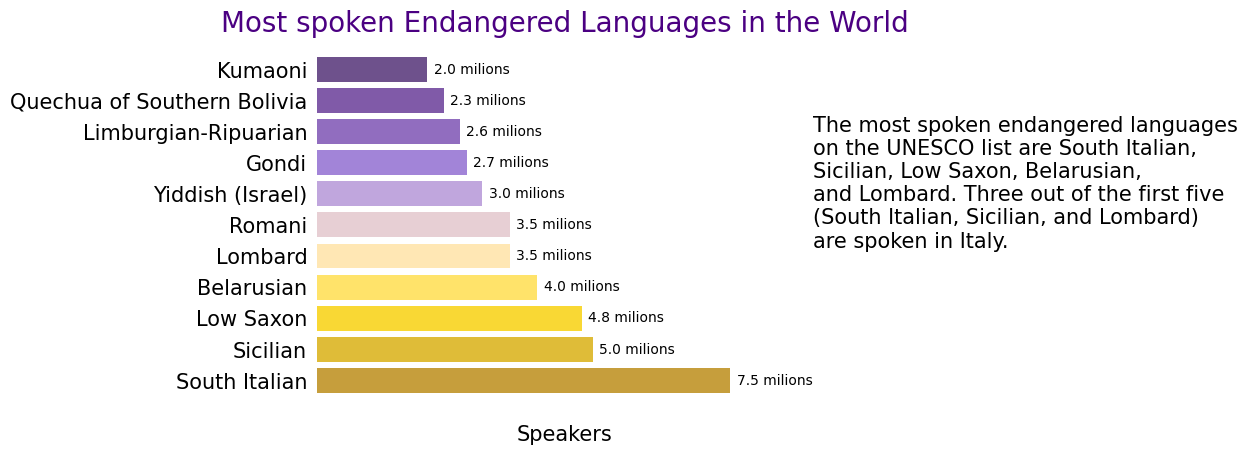

In [27]:
#Create a linear segmented colormap with name 
#from a sequence of colors which evenly move 
#from colors[0] at val=0 to colors[-1] at val=1. 

#colors list for color gradient 
colors = ['darkgoldenrod', 'gold','bisque','mediumpurple', 'rebeccapurple', my_indigo]
#color map name 
cmap_name="custom_cmap"
#parameter to adjust gradient levels
N = 11 
#list of N floats from 0 to N-1
x= np.arange(N).astype(float)
seg_cmap= mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)(x/N)


#plotting
fig, ax = plt.subplots()

#normalization of unit measure (in milions)
milion=10**6

#bar chart
ax.barh(gdf.name[:11],
        gdf.speakers[:11]/milion, 
        alpha=0.8, color=seg_cmap) 

#annotations
for i in range(0, 11):
    ax.annotate(f"{(gdf.speakers[i]/milion).round(1)}"+" milions", 
                   xy=(gdf.speakers[i]/milion+0.8,i), #x is adjusted
                   va = 'center', ha='center',fontweight='light')

#text printed
fig.text(0.9, 0.4, '''
The most spoken endangered languages 
on the UNESCO list are South Italian, 
Sicilian, Low Saxon, Belarusian, 
and Lombard. Three out of the first five 
(South Italian, Sicilian, and Lombard) 
are spoken in Italy.
'''
, fontsize=15, fontweight='light')

#Remove borders
for s in ['top','bottom', 'right','left']:
    ax.spines[s].set_visible(False)
    
#Axis ticks
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.tick_params(bottom=False, labelsize=15)  # remove bottom ticks 
ax.tick_params(left=False, labelsize=15)  # remove left ticks 

ax.set_xticks([2,4,9]) #set ticks (last number affects the xaxis lenght)
ax.set_xticklabels(['','','']) #set ticks labels (none)


plt.ylabel('')
plt.xlabel('Speakers', fontsize=15, color='black')
plt.title('Most spoken Endangered Languages in the World', color='indigo', fontsize=20)

plt.show()



<div style="padding:2px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:20px;background-color:#9370db;font-weight:400">
<b>Italy</b>: there are 32 endangered languages in Italy. Five languages are classified as Severely endangered:</div>

* Griko (Calabria) and Griko (Salento) are varieties of Italiot Greek spoken in the regions of Calabria and Puglia, respectively, in southern Italy.
* Molise Croatian is a variety of Shtokavian Croatian spoken by Italian Croats in the province of Campobasso, in the Molise Region of southern Italy (https://en.wikipedia.org/wiki/Slavomolisano_dialect)
* Töitschu:  Walser language spoken in Piedmont and Aosta Valley, regions of northern Italy.
* Gardiol: Variety of Occitan language spoken in Guardia Piemontese, Calabria, in southern Italy (https://en.wikipedia.org/wiki/Vivaro-Alpine_dialect). 

For Yiddish (Europe), Alemanic, and Bavarian, the number of speakers is not available.

In [28]:
#selecting the languages of Italy
italy_languages=gdf.loc[gdf.countries.str.contains('Italy')]
italy_languages.info()
#NAN speaker are on the tail since the dataset is ordered by number of speakers
print('\n Entries with NAN speakers: \n')
italy_languages.tail(3)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 32 entries, 0 to 2716
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           32 non-null     object  
 1   iso_a3         32 non-null     object  
 2   countries      32 non-null     object  
 3   danger_degree  32 non-null     object  
 4   speakers       29 non-null     float64 
 5   latitude       32 non-null     float64 
 6   longitude      32 non-null     float64 
 7   geometry       32 non-null     geometry
dtypes: float64(3), geometry(1), object(4)
memory usage: 2.2+ KB

 Entries with NAN speakers: 



name                                             iso_a3  \
2543         Alemannic                       DEU, AUT, FRA, ITA, LIE, CHE   
2551          Bavarian                       DEU, AUT, HUN, ITA, CHE, CZE   
2716  Yiddish (Europe)  DEU, AUT, BRB, BEL, DNK, EST, FIN, FRA, HUN, I...   

                                              countries  \
2543  Germany, Austria, France, Italy, Liechtenstein...   
2551  Germany, Austria, Hungary, Italy, Switzerland,...   
2716  Germany, Austria, Belarus, Belgium, Denmark, E...   

              danger_degree  speakers  latitude  longitude  \
2543             Vulnerable       NaN   47.2792     7.6904   
2551             Vulnerable       NaN   48.4146    12.6123   
2716  Definitely endangered       NaN   53.3571    25.2465   

                       geometry  
2543   POINT (7.69040 47.27920)  
2551  POINT (12.61230 48.41460)  
2716  POINT (25.24650 53.35710)

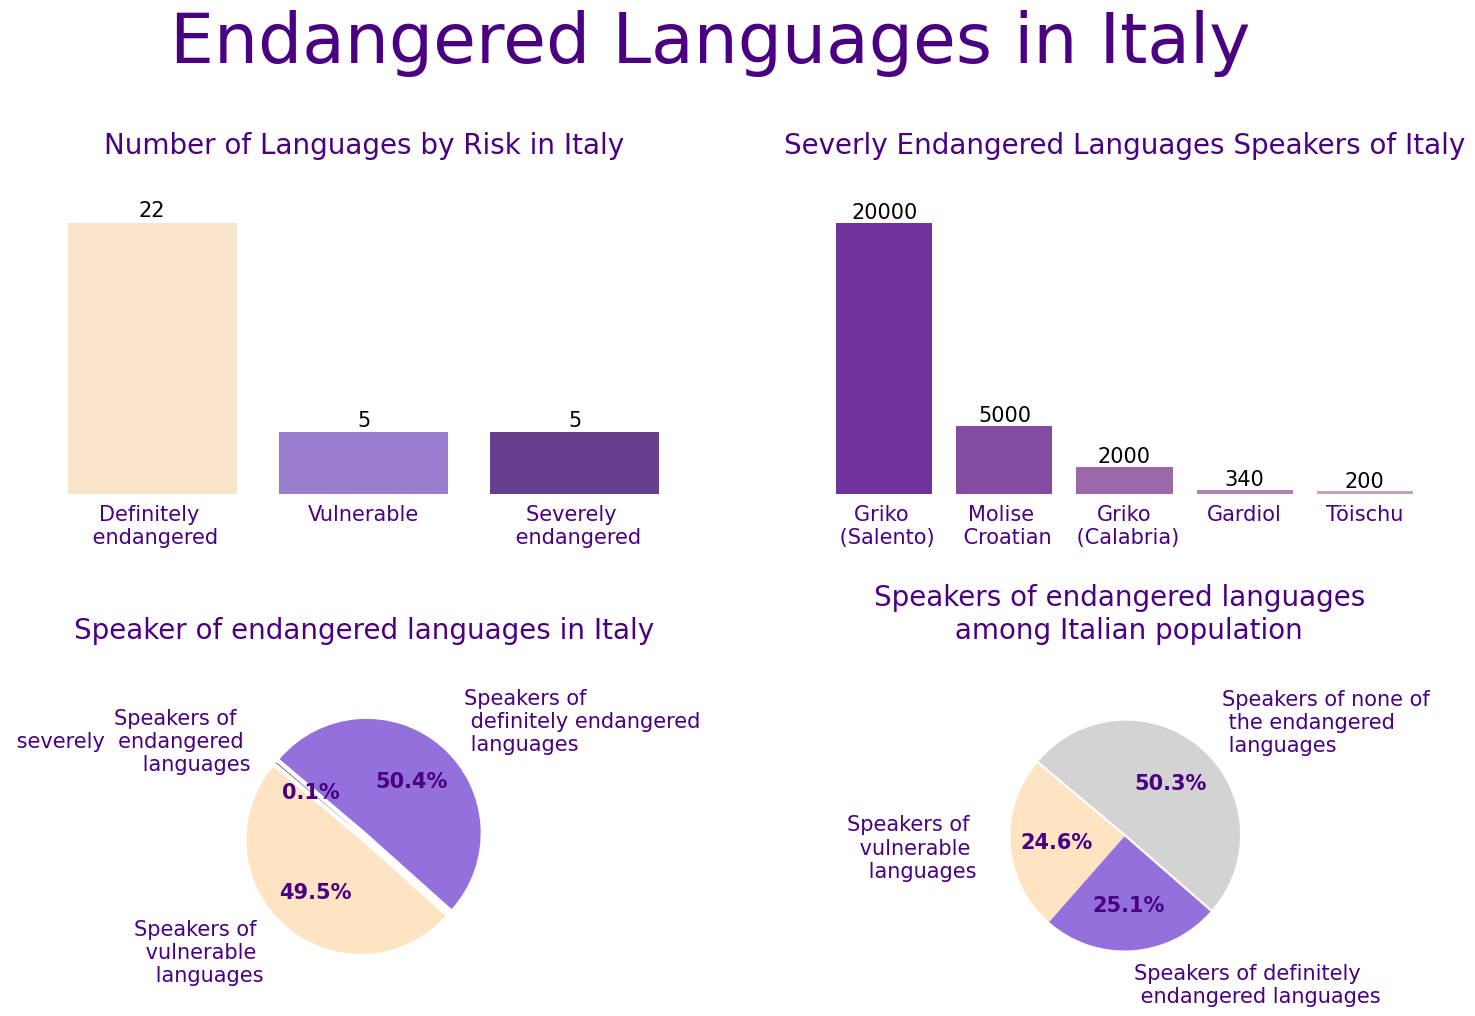

In [29]:
#Plotting four figures

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

#adjust size of the figure
fig.set_figheight(10) 
fig.set_figwidth(18)
plt.subplots_adjust(hspace = 0.7) #vertical space between plot rows 

#Plot title
fig.suptitle('Endangered Languages in Italy \n ', y=1.08,fontsize = 50, color='indigo') #

#Define a color palette for the barchart
color_map=['bisque','mediumpurple','rebeccapurple', 'indigo']
#---------------------------------------------------------------------------
#
#
# First Barchart
#
#
#---------------------------------------------------------------------------
sns.countplot(x = italy_languages.danger_degree, 
              order=italy_languages.danger_degree.value_counts().index,
              ax = ax1, 
              palette=color_map)

#ticks of the bar plot
ax1.tick_params(left=False, labelsize=15)
ax1.tick_params(bottom=False, labelsize=15)  

#title of the bar plot
ax1.set_title('Number of Languages by Risk in Italy', pad = 20, 
              fontsize = 20,
              color='indigo', 
              y=1.1)#distance of the title from the barchart


#Remove thicks labels on left axis
ax1.set(yticklabels=[])

ax1.set_xticks([x for x in range(0, len(italy_languages.danger_degree.value_counts()))])
ax1.set_xticklabels(['Definitely \n endangered','Vulnerable','Severely \n endangered'],
                   fontsize=15,color='indigo')
#Remove borders of the barplot
for s in ['top', 'bottom','left','right']:
    ax1.spines[s].set_visible(False)
    
#annotations
for i in range(0, 3):
    ax1.annotate(f"{italy_languages.danger_degree.value_counts().iloc[i]}", 
                   xy=(i, italy_languages.danger_degree.value_counts().iloc[i]+1), 
                   va = 'center', ha='center', fontsize='15')
#Remove axis labels
ax1.set_ylabel('', fontsize = 15,color='indigo')
ax1.set_xlabel('', fontsize = 15,color='indigo')

#---------------------------------------------------------------------------
#
#
# Second barchart
#
#
#---------------------------------------------------------------------------


#colors of the bar chart
clist = [(0, 'indigo'), (0.75, 'bisque'),(1, 'rebeccapurple')]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 9
x = np.arange(N).astype(float)

#plot
ax2.bar(italy_languages.name[italy_languages.danger_degree=='Severely endangered'], 
         italy_languages.speakers[italy_languages.danger_degree=='Severely endangered'],
         alpha=0.8,
         color=rvb(x/N))

#ticks of the bar plot
#first ax1.set_xticks and then ax1.set_xticklabels to avoid warning
ax2.set_xticks(italy_languages.name[italy_languages.danger_degree=='Severely endangered'])
ax2.set_xticklabels(['Griko \n (Salento)','Molise \n Croatian','Griko\n (Calabria)', 'Gardiol','Töischu'],
                   fontsize=25,color='indigo')

#title of the bar plot
ax2.set_title('Severly Endangered Languages Speakers of Italy', pad = 20, fontsize = 20,color='indigo',  y=1.1)
#Remove ylabel 
ax2.set_ylabel('', fontsize = 15,color='indigo')

# Remove bottom and left ticks 
ax2.tick_params(bottom=False, labelsize=15)  
ax2.tick_params(left=False, labelsize=15)
#Remove thicks labels on left axis
ax2.set(yticklabels=[])

#Remove borders
for s in ['top', 'bottom','left','right']:
    ax2.spines[s].set_visible(False)

#annotations
for i in range(0, len(italy_languages[italy_languages.danger_degree=='Severely endangered'])):
    ax2.annotate(f"{italy_languages.speakers[italy_languages.danger_degree=='Severely endangered'].iloc[i].astype(int)}", 
                   xy=(i, italy_languages.speakers[italy_languages.danger_degree=='Severely endangered'].iloc[i]+800), 
                   va = 'center', ha='center', fontsize='15')

#---------------------------------------------------------------------------
#
#
#PIE CHARTS
#
#
#---------------------------------------------------------------------------
#erasing NAN value in 'speakers' for plotting the Pie Chart
speakers_it=pd.DataFrame({'speakers':italy_languages['speakers'],
                          'danger_degree':italy_languages['danger_degree']})
speakers_it=speakers_it.dropna(subset=['speakers'], how='any')
#---------------------------------------------------------------------------
#
#
#
# First Pie Chart
#
#
#
#---------------------------------------------------------------------------
number_languages_it =speakers_it.speakers.sum()
#Three sections of the pie chart 
#(in Italy there are no critically or extinct languages)
vulnerable = speakers_it.speakers[speakers_it.danger_degree=='Vulnerable'].sum()
definetely = speakers_it.speakers[speakers_it.danger_degree=='Definitely endangered'].sum()
severely = speakers_it.speakers[speakers_it.danger_degree=='Severely endangered'].sum()
#set pie labels
labels = 'Speakers of \n vulnerable \n languages', 'Speakers of \n definitely endangered \n languages', 'Speakers of  \n severely  endangered \n languages'
#slices size
sizes = [vulnerable/number_languages_it, 
         definetely /number_languages_it,
         (severely/number_languages_it)] 
#slices color
colors = ['bisque', 'mediumpurple',my_indigo]
#first slice
explode = (0.04, 0.04, 0)  
#plot
wedges, texts, autotexts =ax3.pie(sizes, 
                                  explode=explode, 
                                  labels=labels,
                                  colors=colors, 
                                  autopct='%1.1f%%',
                                  shadow=False, 
                                  startangle=140,
                                  labeldistance=1.3,
                                  textprops=dict(color="indigo"))

#text label of the pie chart
plt.setp(texts, size=15) 
#percentage text on the pie chart
plt.setp(autotexts, size=15, weight="bold") 

ax3.set_title('Speaker of endangered languages in Italy', pad = 20, 
              fontsize = 20, 
              color='indigo', 
              y=1.1) #distances of the title from the chart

#---------------------------------------------------------------------------
#---------------------------------------------------------------------------
#
#
#Second Pie Chart
#
#---------------------------------------------------------------------------
#---------------------------------------------------------------------------
italy_population=58921658 
#slices labels
labels = 'Speakers of \n vulnerable \n languages', 'Speakers of definitely \n endangered languages','Speakers of none of \n the endangered \n languages'
others=(italy_population-vulnerable-definetely-severely)
#slices size
sizes = [vulnerable/italy_population, 
         (definetely)/italy_population,
         #severely/italy_population, (too small to be seen!)
         others/italy_population]
#slices colors
colors = ['bisque', 'mediumpurple','lightgray']
#first slice
explode = (0, 0, 0.02) 
#plot
wedges, texts, autotexts =ax4.pie(sizes, 
        explode=explode, labels=labels, 
        colors=colors, 
        autopct='%1.1f%%', 
        labeldistance=1.3,
        shadow=False, 
        startangle=140,
        textprops=dict(color="indigo"))
#pie text
plt.setp(texts, size=15) #text label of the pie chart
plt.setp(autotexts, size=15, weight="bold") #percentage text on the pie chart
#pie title
plt.title('Speakers of endangered languages \n among Italian population', pad = 20, 
          fontsize = 20, 
          color='indigo', 
          y=1.1)#distances of the title from the chart

plt.show()

<a id="8"></a>
<div style="padding:2px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:40px;background-color:#9370db;font-weight:500">
8. Interactive Map with Plotly: Europe
</div>




<div style="padding:2px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:20px;background-color:#9370db;font-weight:400">
The following interactive chart displays languages on the map according to their geolocation. The size of the bubble marker reflects the number of speakers for that language, while the color indicates the risk of extinction. A popup text helps navigate the chart. Risk categories can also be displayed or hidden by clicking on the legend options. Have fun!</div>

In [30]:
#selecting europe, country coedes from Wikipedia
gdf_europe= gdf.loc[gdf.iso_a3.str.contains('AUT|BEL|SPA|BGR|HRV|CHE|CYP|CZE|DNK|EST|ESP|FIN|FRA|DEU|GB|GRC|HUN|IRL|ITA|LVA|LTU|LUX|MLT|NLD|POL|PRT|ROU|SVK|SVN|SWE|UKR')] 

#Plotting
fig = go.Figure()

degree_of_danger=['Vulnerable','Definitely endangered','Severely endangered','Critically endangered','Extinct' ]
color_map=['bisque','goldenrod','mediumpurple','rebeccapurple', my_indigo] #marker color
symbol = ['circle','circle','circle','square', 'x-dot'] #marker symbol
legend_label=['Vulnerable', 'Definitely Endangered', 'Severely Endangered', 'Critically Endangered', 'Extinct']


#drop NAN in speakers, we are going to use the number of speakers in the chart
gdf_europe=gdf_europe.dropna(subset=['speakers'], how='any')



#Tailoring bubble size so that the extinct languages are also visible on the map
#and bubble sizes reflects the number of spaekers
gdf_europe['speakers_display'] = ((gdf_europe['speakers']/600000+1)**0.8*6)



#Setting the text displayed as popup text on the map
gdf_europe['text_popup']= gdf_europe['name'] + ': ' + gdf_europe['danger_degree']+'<br>' +'Speakers:'+ gdf_europe['speakers'].astype(int).astype(str) + '<br>'+ gdf_europe['countries']


#repeat the plot for each category 'Vulnerable', ..., 'Extinct'
#so to get bubbles with the desired colors, the appropriate name in the legend and the chosen symbol
for i in range(0, len(degree_of_danger)):  
    fig.add_trace(go.Scattergeo(
            locationmode = 'country names', 
            lon=gdf_europe['longitude'][gdf_europe.danger_degree==degree_of_danger[i]],
            lat=gdf_europe['latitude'][gdf_europe.danger_degree==degree_of_danger[i]],
            text = gdf_europe['text_popup'][gdf_europe.danger_degree==degree_of_danger[i]], #popup text
            mode = 'markers',
            name = legend_label[i], #legend
            line = dict(
                width=3,
                color=my_indigo),
            marker = dict(
                size =gdf_europe['speakers_display'][gdf_europe.danger_degree==degree_of_danger[i]], #bubble size
                color=color_map[i],#bubble color
                symbol=symbol[i]
                         ) 
            ))

    
#layout
fig.update_layout(
        title = 'Endangered Languages in Europe ', #chart title
        geo=dict(landcolor = 'rgb(250, 250, 250)', 
                 countrywidth = 1,
                 countrycolor = 'mediumpurple',
                 scope='europe') #set the continet
    )


fig.show()

**This is the end**. Thank you for having a look! 
